# `AIR-BNB CASE STUDY`

In [1]:
# IMPORTING NECESSARY LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# IMPORTING WARNINGS
import warnings
warnings.filterwarnings("ignore")

# `READING & UNDERSTANDING DATA`

In [3]:
# READING THE DATA-SET
df = pd.read_csv("AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [4]:
df.shape

(48895, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


- **WE CAN SEE THAT THERE ARE SOME IRREGULARITIES IN PRICE COLUMN AS MINIMUM PRICE IS O i.e. `FREE STAY` AND SOME OUTLIERS VALUES ARE ALSO PRESENT IN THE ABOVE COLUMNS, SO WE WILL LOOK INTO IT.**

In [7]:
df.select_dtypes(include=['object']).describe()

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,48879,48874,48895,48895,48895,38843
unique,47896,11452,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,23-06-2019
freq,18,417,21661,3920,25409,1413


# `HANDLING MISSING VALUES`

In [8]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

last_review                       20.558339
reviews_per_month                 20.558339
host_name                          0.042949
name                               0.032723
id                                 0.000000
host_id                            0.000000
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

- **MISSING VALUES ARE PRESENT IN `NAME, HOST_NAME, LAST_REVIEWS & REVIEWS_PER_MONTH_COLUMNS`.**
- **IN THE ABOVE EXPLORATING PART WE CAN SEE THAT IF THE `N0_OF_REVIEWS = 0` THEN IT DOES NOT MAKE SENSE TO HAVE `LAST_REVIEW & REVIEWS_PER_MONTH` AND ARE MARKED AS NULL. HENCE THE MISSING VALUES IN THE DATA IS FOLLOWING A PATTERN AND WILL BE TREATED ACCORDINGLY.**

- **LET's CHECK WHEATHER ABOVE ASSUMPTION HOLDS TRUE OR NOT.**

In [10]:
assumption = df.loc[(df.last_review.isnull()) & 
                           (df.reviews_per_month.isnull())][['number_of_reviews',  'last_review', 'reviews_per_month']]
assumption

,number_of_reviews,last_review,reviews_per_month
2,0,NaN,NaN
19,0,NaN,NaN
26,0,NaN,NaN
36,0,NaN,NaN
38,0,NaN,NaN
...,...,...,...
48890,0,NaN,NaN
48891,0,NaN,NaN
48892,0,NaN,NaN
48893,0,NaN,NaN


- **AS WE CAN SEE THE ABOVE ASSUMPTION HOLDS TRUE.**

In [11]:
# LETS CHECK THE SHAPE OF ASSUMPTION
assumption.shape

(10052, 3)

- **THE EXACT AMOUNT OF NULL VALUES ARE PRESENT IN BOTH THE COLUMNS WHICH PROVES THAT THE ABOVE ASSUMPTION THAT WAS MADE IS CLEAR AND CONCISE.**
- **WE WILL IMPUTE THE `REVIEWS_PER_MONTH` COLUMN WITH `0` AND DROP THE `LAST_REVIEW` COLUMN AS IT WILL BE OF NO USE TO US FOR THE ASSIGNMENT.**

In [12]:
df.reviews_per_month.fillna(0, inplace=True)

In [13]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [14]:
df.drop(['last_review'], axis=1, inplace=True)

In [15]:
df[df.isnull().any(axis=1)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
360,100184,Bienvenue,526653,NaN,Queens,Queens Village,40.72413,-73.76133,Private room,50,1,43,0.45,1,88
2700,1449546,Cozy Studio in Flatbush,7779204,NaN,Brooklyn,Flatbush,40.64965,-73.96154,Entire home/apt,100,30,49,0.69,1,342
2854,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,0.00,1,362
3703,2232600,NaN,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,0.45,1,341
5745,4183989,SPRING in the City!! Zen-Style Tranquil Bedroom,919218,NaN,Manhattan,Harlem,40.80606,-73.95061,Private room,86,3,34,1.00,1,359
5775,4209595,NaN,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,0.02,1,0
5975,4370230,NaN,22686810,Michaël,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,7,5,0.09,1,0
6075,4446862,Charming Room in Prospect Heights!,23077718,NaN,Brooklyn,Crown Heights,40.67512,-73.96146,Private room,50,1,0,0.00,1,0
6269,4581788,NaN,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,0.00,1,0
6567,4756856,NaN,1832442,Carolina,Brooklyn,Bushwick,40.70046,-73.92825,Private room,70,1,0,0.00,1,0


- **HERE WE CAN SEE `21 HOST_NAME` AND `16 NAME` WHICH ARE MISSING**.
- **SINCE THESE VALUES ARE VERY LESS IN NUMBER WE WILL IMPUTE IT WITH `MODE` AS THEY ARE `CATEGORICAL COLUMNS`**.

In [16]:
df.host_name.fillna(df.host_name.mode()[0], inplace=True)

df.name.fillna(df.name.mode()[0], inplace=True)

In [17]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

# `TREATING OUTLIERS`

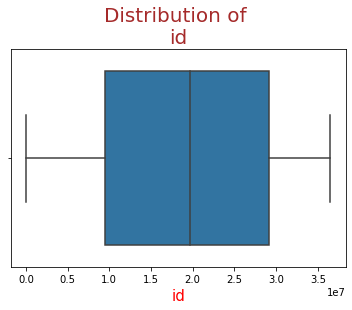

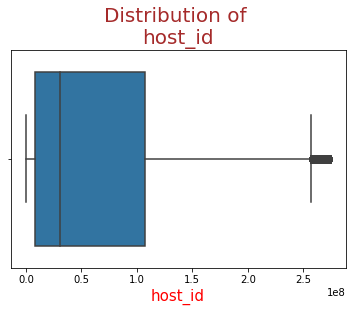

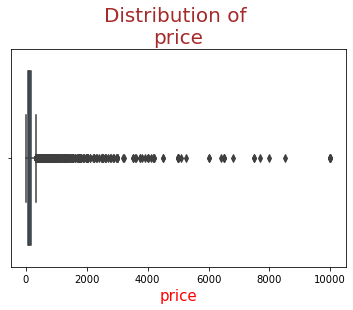

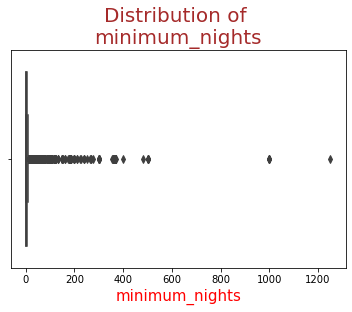

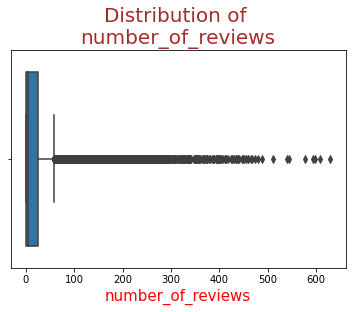

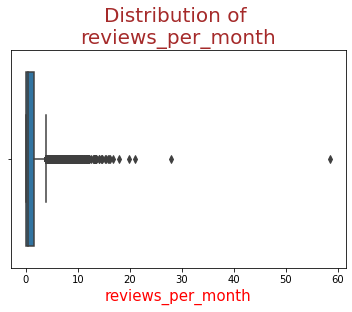

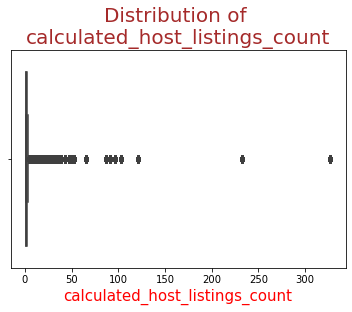

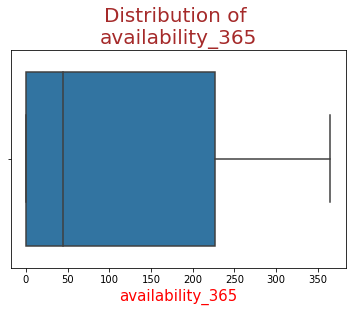

In [18]:
# I'AM CREATING A LIST AND RUNNING A FOR-LOOP FOR FINDING OUTLIERS IN COLUMNS

outliers_checking = df[['id','host_id','price','minimum_nights','number_of_reviews','reviews_per_month',
                                'calculated_host_listings_count','availability_365']]            # LIST COLUMN

for i in outliers_checking:
    sns.boxplot(df[i])      # CREATING A BOXPLOT TO CHECK FOR OUTLIERS
    plt.xlabel(i, fontdict={"fontsize":15, "fontweight":8, "color":"red"})      # GIVING NAME FOR X-AXIS
    plt.title("Distribution of \n" +i,fontdict={"fontsize":20, "fontweight":10, "color":"brown"})   # GIVING TITLE
    plt.show()

In [19]:
# AGAIN RUNNING A FOR-LOOP FOR THE SAME LIST AND REMOVING THE OUTLIERS OF THAT LIST

for j in outliers_checking:
    q1 = df[j].quantile(0.10)   # THIS WILL GIVE ME 10% VALUE OF DATA
    q3 = df[j].quantile(0.90)   # THIS WILL GIVE ME 90% VALUE OF DATA
    iqr = q3 - q1                             # INTER-QUARTILE RANGE FORMULA
    lower_bound = q1 - 1.5*iqr                # LOWER-BOUND FORMULA
    upper_bound = q3 + 1.5*iqr                # UPPER-BOUND FORMULA
    df[j] = np.where(df[j] < lower_bound, lower_bound, df[j])
    df[j] = np.where(df[j] > upper_bound, upper_bound, df[j])

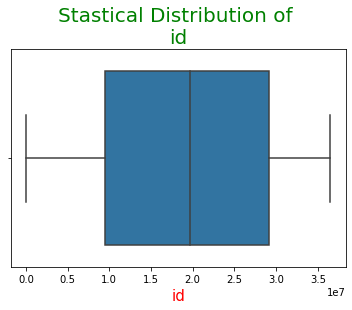

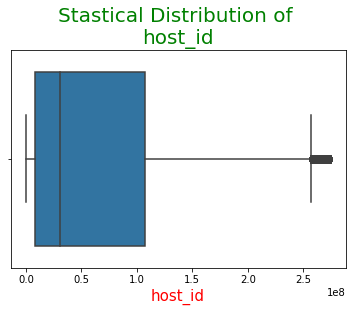

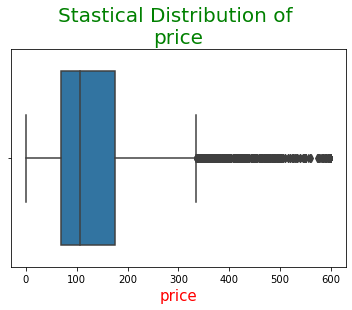

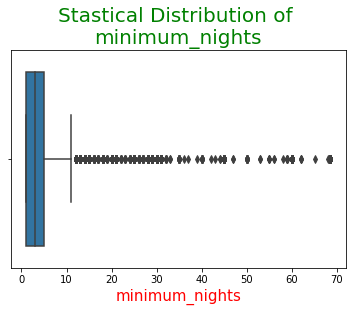

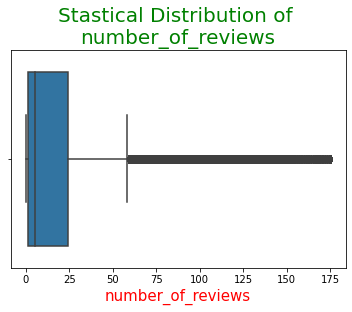

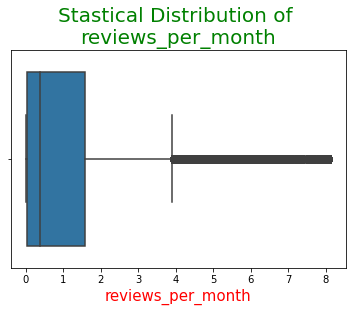

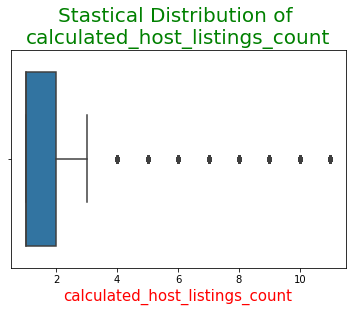

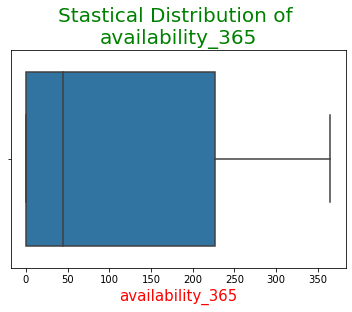

In [20]:
# CROSS-CHECKING THE OUTLIERS

for i in outliers_checking:
    sns.boxplot(df[i])
    plt.xlabel(i, fontdict={"fontsize":15, "fontweight":8, "color":"red"})
    plt.title("Stastical Distribution of \n" +i,fontdict={"fontsize":20, "fontweight":10, "color":"green"})
    plt.show()

- **SOME PROPERTIES HAVE PRICE AS 0 i.e. FREE STAY. CLEARLY THIS IS AN ERROR. SO WE WILL REPLACE IT WITH MEDIAN VALUES.**

In [21]:
df[df.price == 0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597.0,"Huge Brooklyn Brownstone Living, Close to it all.",8993084.0,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0.0,4.0,1.0,0.05,4.0,28.0
25433,20333471.0,★Hostel Style Room | Ideal Traveling Buddies★,131697576.0,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0.0,2.0,55.0,2.56,4.0,127.0
25634,20523843.0,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004.0,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0.0,2.0,16.0,0.71,5.0,0.0
25753,20608117.0,"Sunny, Quiet Room in Greenpoint",1641537.0,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0.0,2.0,12.0,0.53,2.0,0.0
25778,20624541.0,Modern apartment in the heart of Williamsburg,10132166.0,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0.0,5.0,3.0,0.15,1.0,73.0
25794,20639628.0,Spacious comfortable master bedroom with nice ...,86327101.0,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0.0,1.0,93.0,4.28,6.0,176.0
25795,20639792.0,Contemporary bedroom in brownstone with nice view,86327101.0,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0.0,1.0,95.0,4.37,6.0,232.0
25796,20639914.0,Cozy yet spacious private brownstone bedroom,86327101.0,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0.0,1.0,95.0,4.35,6.0,222.0
26259,20933849.0,the best you can find,13709292.0,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0.0,3.0,0.0,0.00,1.0,0.0
26841,21291569.0,Coliving in Brooklyn! Modern design / Shared room,101970559.0,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0.0,30.0,2.0,0.11,6.0,333.0


In [22]:
len(df[df.price == 0])

11

In [23]:
price_0  = (df['price'] == 0 )
df.loc[price_0, 'price'] = df['price'].median()

In [24]:
df[df.price == 0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365


In [25]:
df.to_csv(r"D:\\Nikhil Documents\\AIR-BNB CASE STUDY\\Data_Cleaned_AB_NYC.csv", index = False, header=True)